In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from scipy import signal
from scipy import interpolate
import numpy as np
from math import pi as pi
from scipy.signal import butter, lfilter, freqz
from scipy.interpolate import splrep

In [4]:
df = pd.read_csv('/home/lubov/500.txt', sep="\t" ,header =[0,1])

In [5]:
t = df.iloc[:1000, 0] 
sig = df.iloc[:1000, 1]

In [6]:
sig

0     -0.145
1     -0.145
2     -0.145
3     -0.145
4     -0.145
5     -0.145
6     -0.145
7     -0.145
8     -0.120
9     -0.135
10    -0.145
11    -0.150
12    -0.160
13    -0.155
14    -0.160
15    -0.175
16    -0.180
17    -0.185
18    -0.170
19    -0.155
20    -0.175
21    -0.180
22    -0.190
23    -0.180
24    -0.155
25    -0.135
26    -0.155
27    -0.190
28    -0.205
29    -0.235
       ...  
970   -0.410
971   -0.415
972   -0.410
973   -0.395
974   -0.405
975   -0.410
976   -0.405
977   -0.405
978   -0.410
979   -0.390
980   -0.385
981   -0.390
982   -0.395
983   -0.400
984   -0.400
985   -0.400
986   -0.395
987   -0.395
988   -0.405
989   -0.405
990   -0.400
991   -0.395
992   -0.385
993   -0.375
994   -0.385
995   -0.395
996   -0.390
997   -0.385
998   -0.375
999   -0.385
Name: (   MLII,    (mV)), Length: 1000, dtype: float64

In [26]:
order = 1
fs = 1/(t.iloc[2] - t.iloc[1])
cutoff = 15
fs

333.3333333333333

In [7]:
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='lowpass', analog=False)
    return b, a

In [8]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [28]:
b, a = butter_lowpass(cutoff, fs, order)

In [23]:
w, h = freqz(b, a)

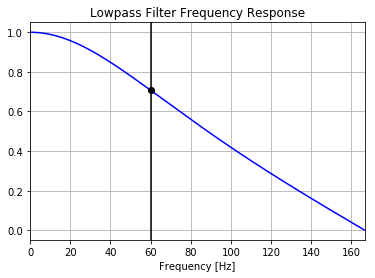

In [11]:
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [16]:
y = butter_lowpass_filter(sig, cutoff, fs, order)

In [24]:
y2 = butter_lowpass_filter(sig, cutoff, fs, order)

In [12]:
y1 = butter_lowpass_filter(sig, cutoff, fs, order)

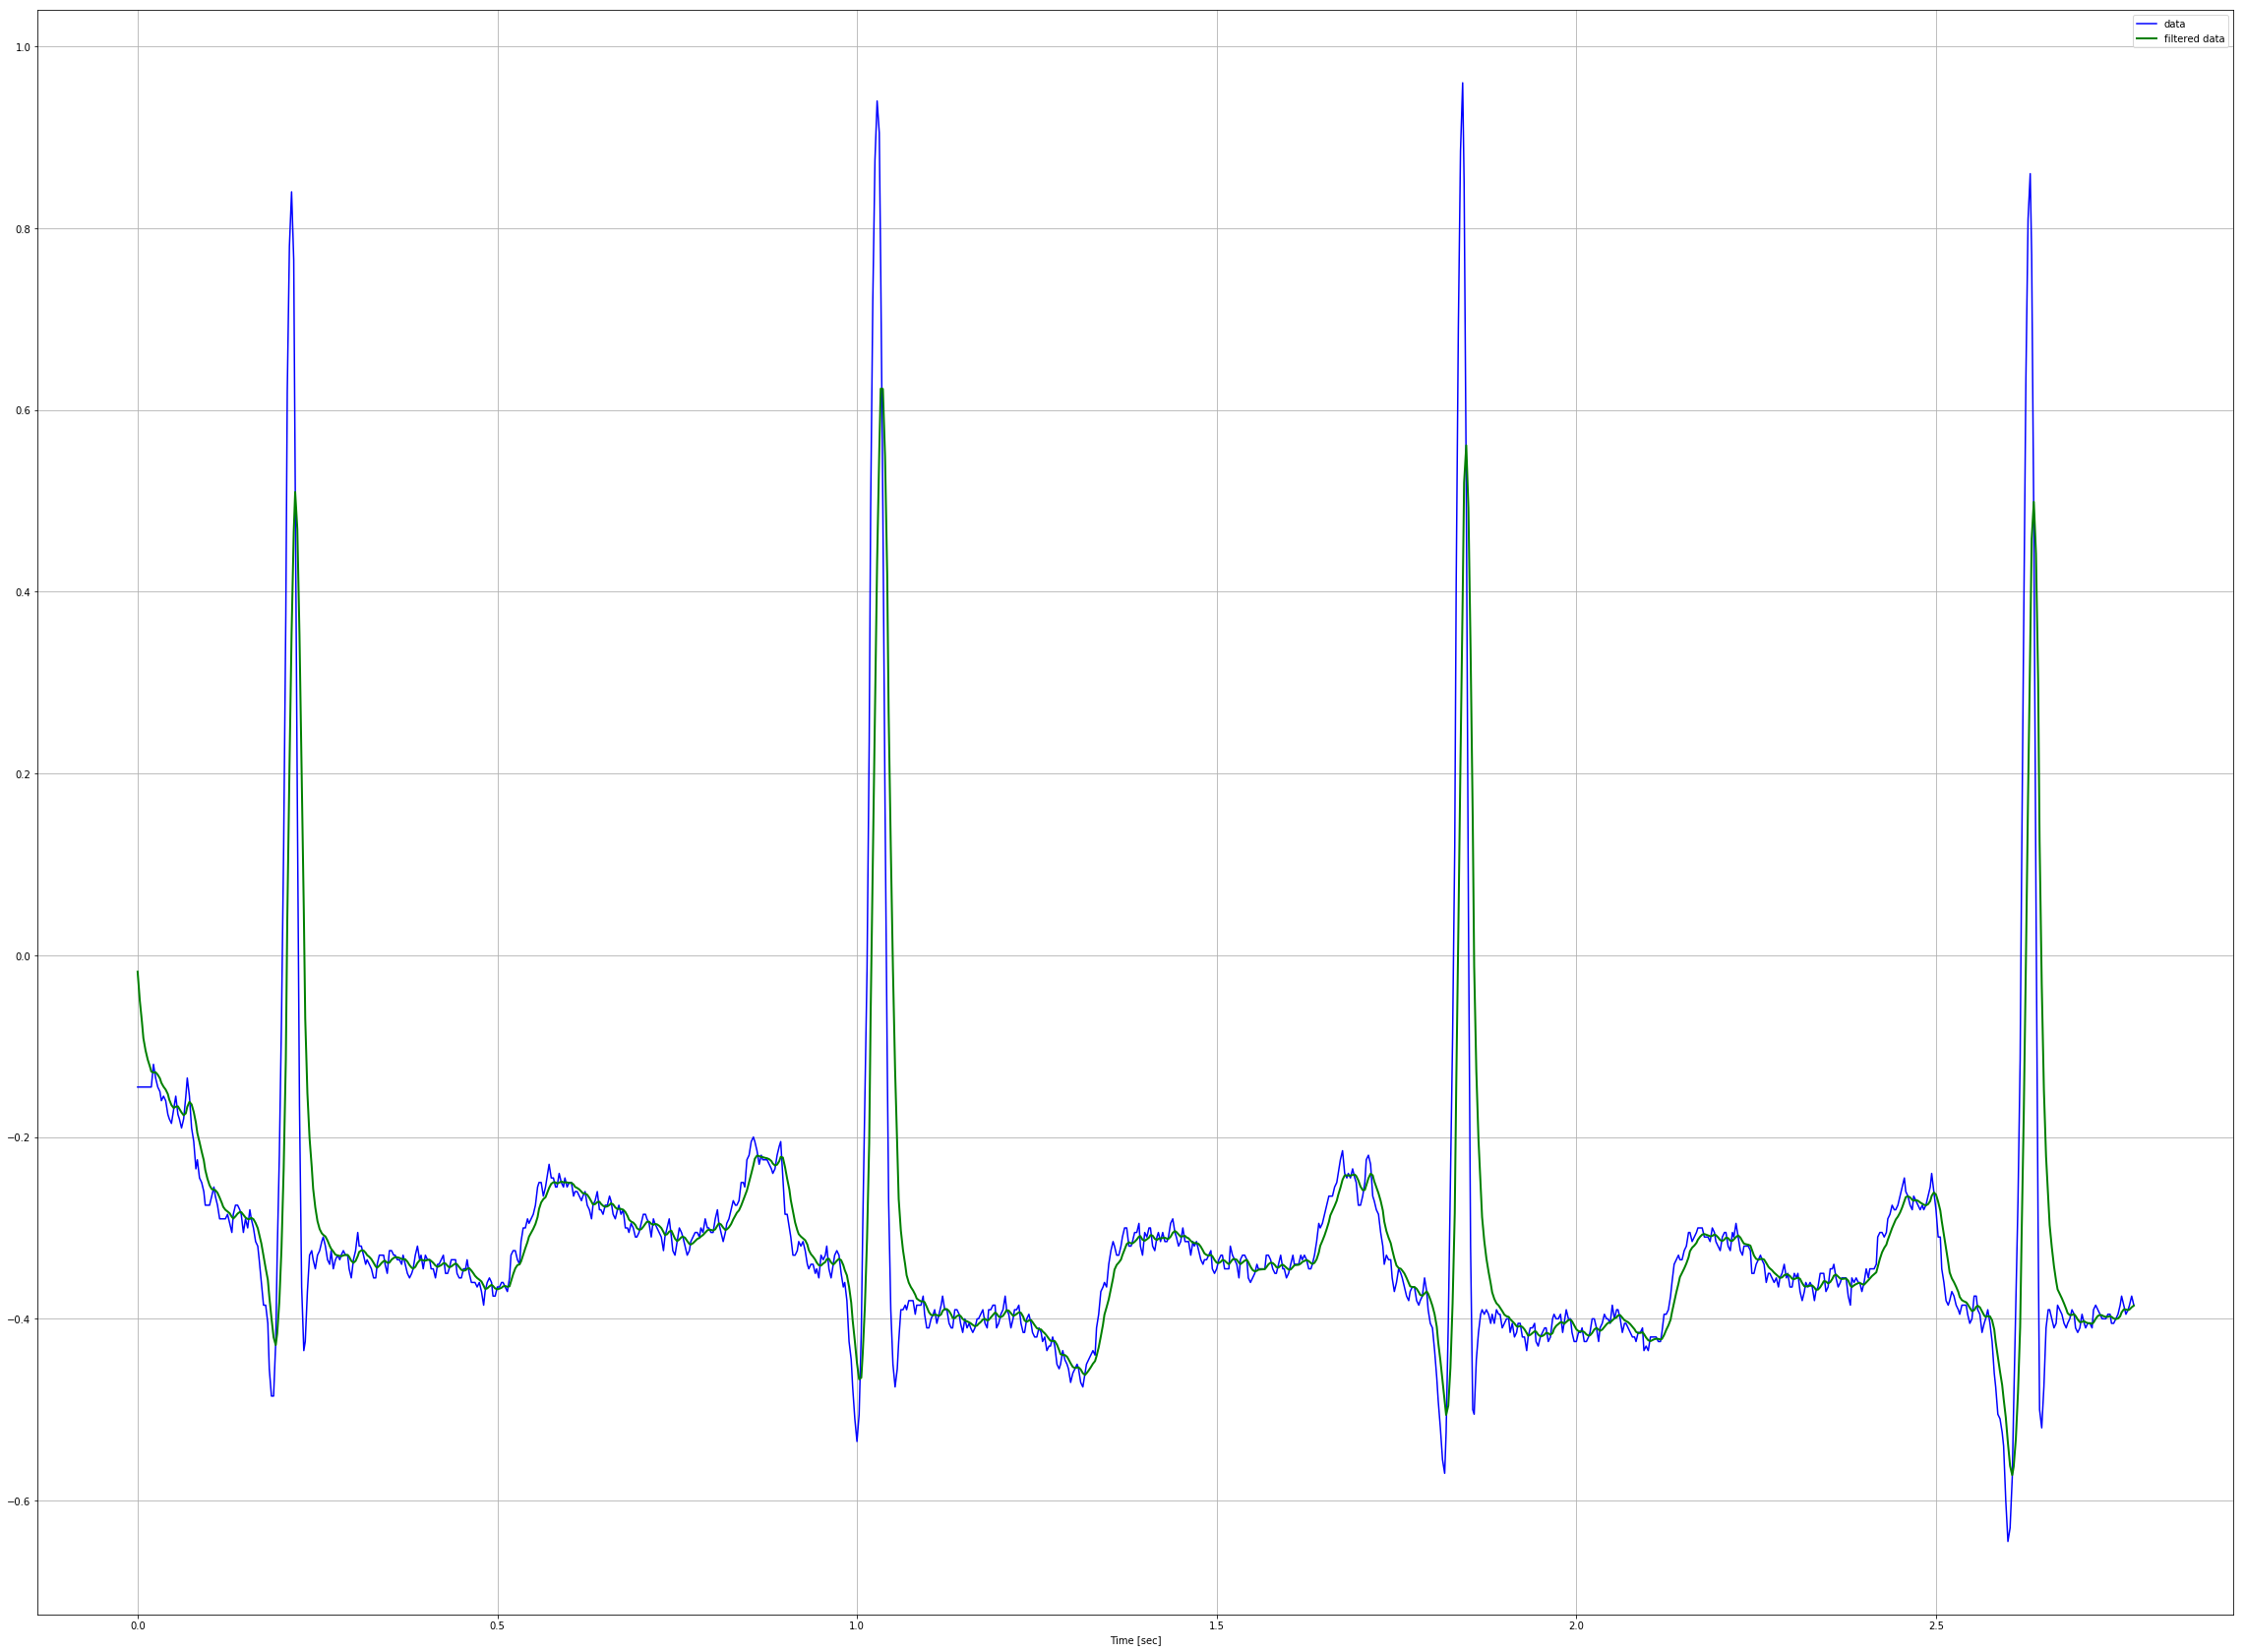

In [22]:
plt.figure(figsize=(40,30))
plt.plot(t, sig, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid() 

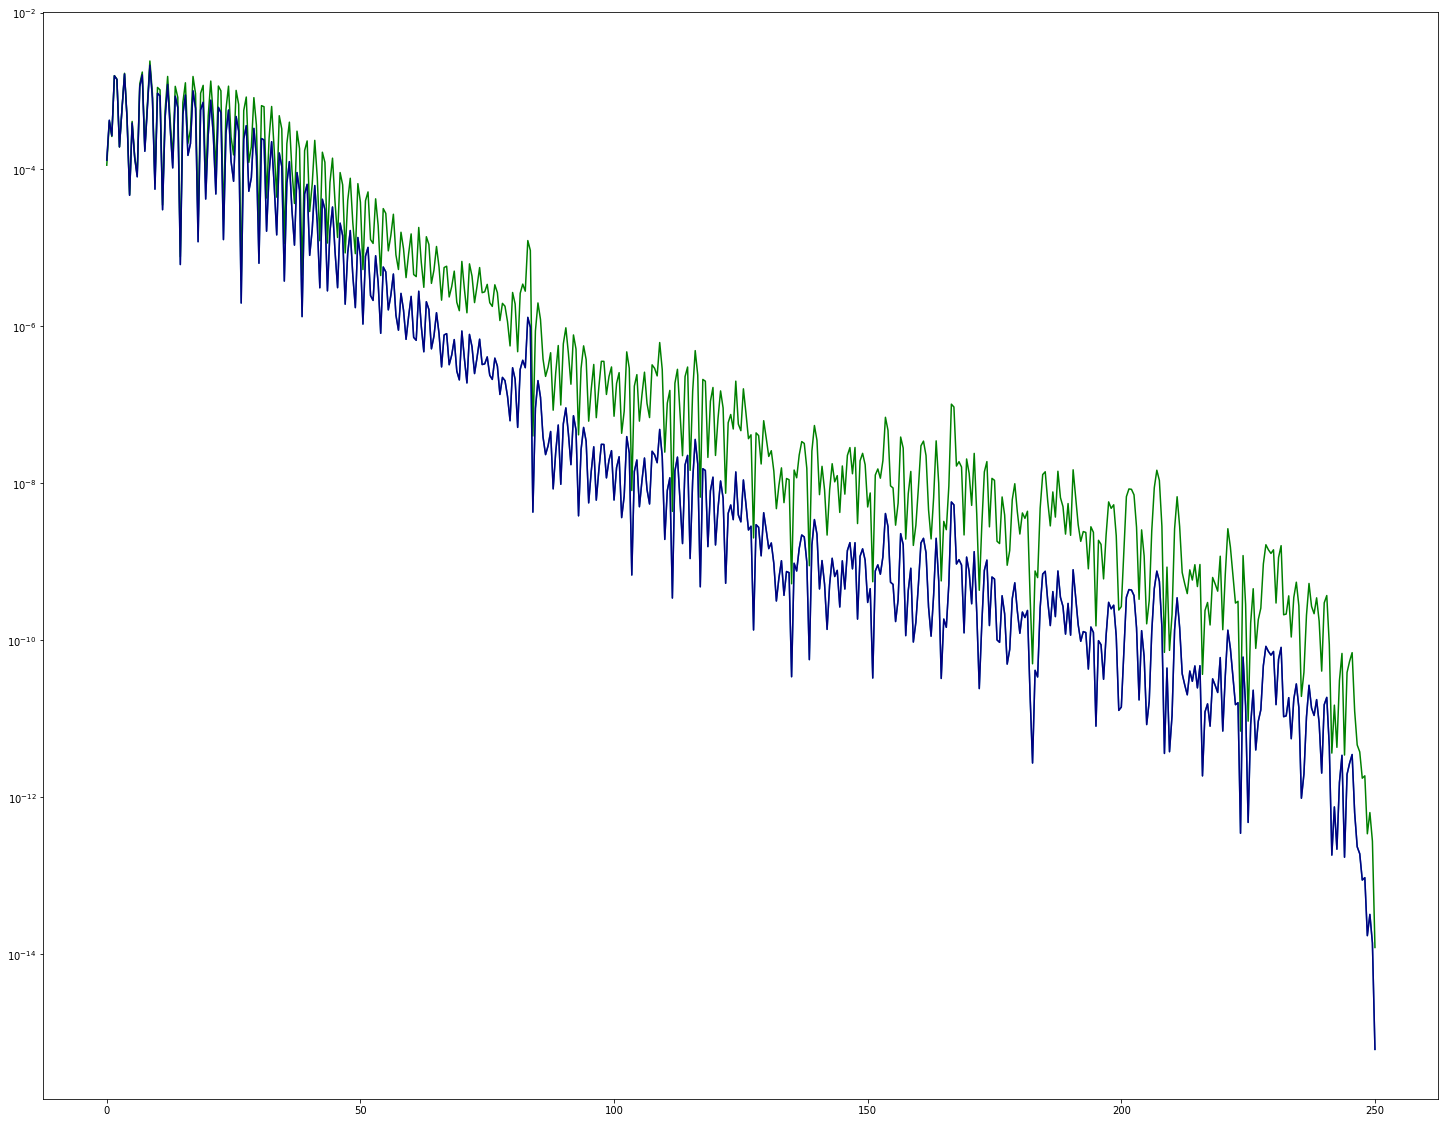

In [25]:
f, Pxx_den = signal.welch(y, 500, nperseg=1024,scaling='spectrum')
f1, Pxx_den1 = signal.welch(y1, 500, nperseg=1024,scaling='spectrum')
f2, Pxx_den2 = signal.welch(y2, 500, nperseg=1024,scaling='spectrum')
plt.figure(figsize=(25,20))
plt.semilogy(f, Pxx_den)
plt.semilogy(f1, Pxx_den1,'g-')
plt.semilogy(f2, Pxx_den2,'navy')

In [1]:
from statsmodels.nonparametric.smoothers_lowess import lowess


In [37]:
filtered[:,1]

array([ 3.39270456e-08,  3.38112107e-08,  3.36953688e-08,  3.35795200e-08,
        3.34636642e-08,  3.33478013e-08,  3.32319313e-08,  3.31160541e-08,
        3.30001696e-08,  3.28842778e-08,  3.27683786e-08,  3.26524720e-08,
        3.25365579e-08,  3.24206362e-08,  3.23047069e-08,  3.21887699e-08,
        3.20728252e-08,  3.19568726e-08,  3.18409121e-08,  3.17249437e-08,
        3.16089673e-08,  3.14929828e-08,  3.13769901e-08,  3.12609892e-08,
        3.11449800e-08,  3.10289624e-08,  3.09129364e-08,  3.07969018e-08,
        3.06808587e-08,  3.05648069e-08,  3.04487464e-08,  3.03326770e-08,
        3.02165988e-08,  3.01005116e-08,  2.99844154e-08,  2.98683100e-08,
        2.97521954e-08,  2.96360716e-08,  2.95199383e-08,  2.94037957e-08,
        2.92876435e-08,  2.91714816e-08,  2.90553101e-08,  2.89391288e-08,
        2.88229376e-08,  2.87067365e-08,  2.85905253e-08,  2.84743040e-08,
        2.83580725e-08,  2.82418306e-08,  2.81255783e-08,  2.80093156e-08,
        2.78930422e-08,  

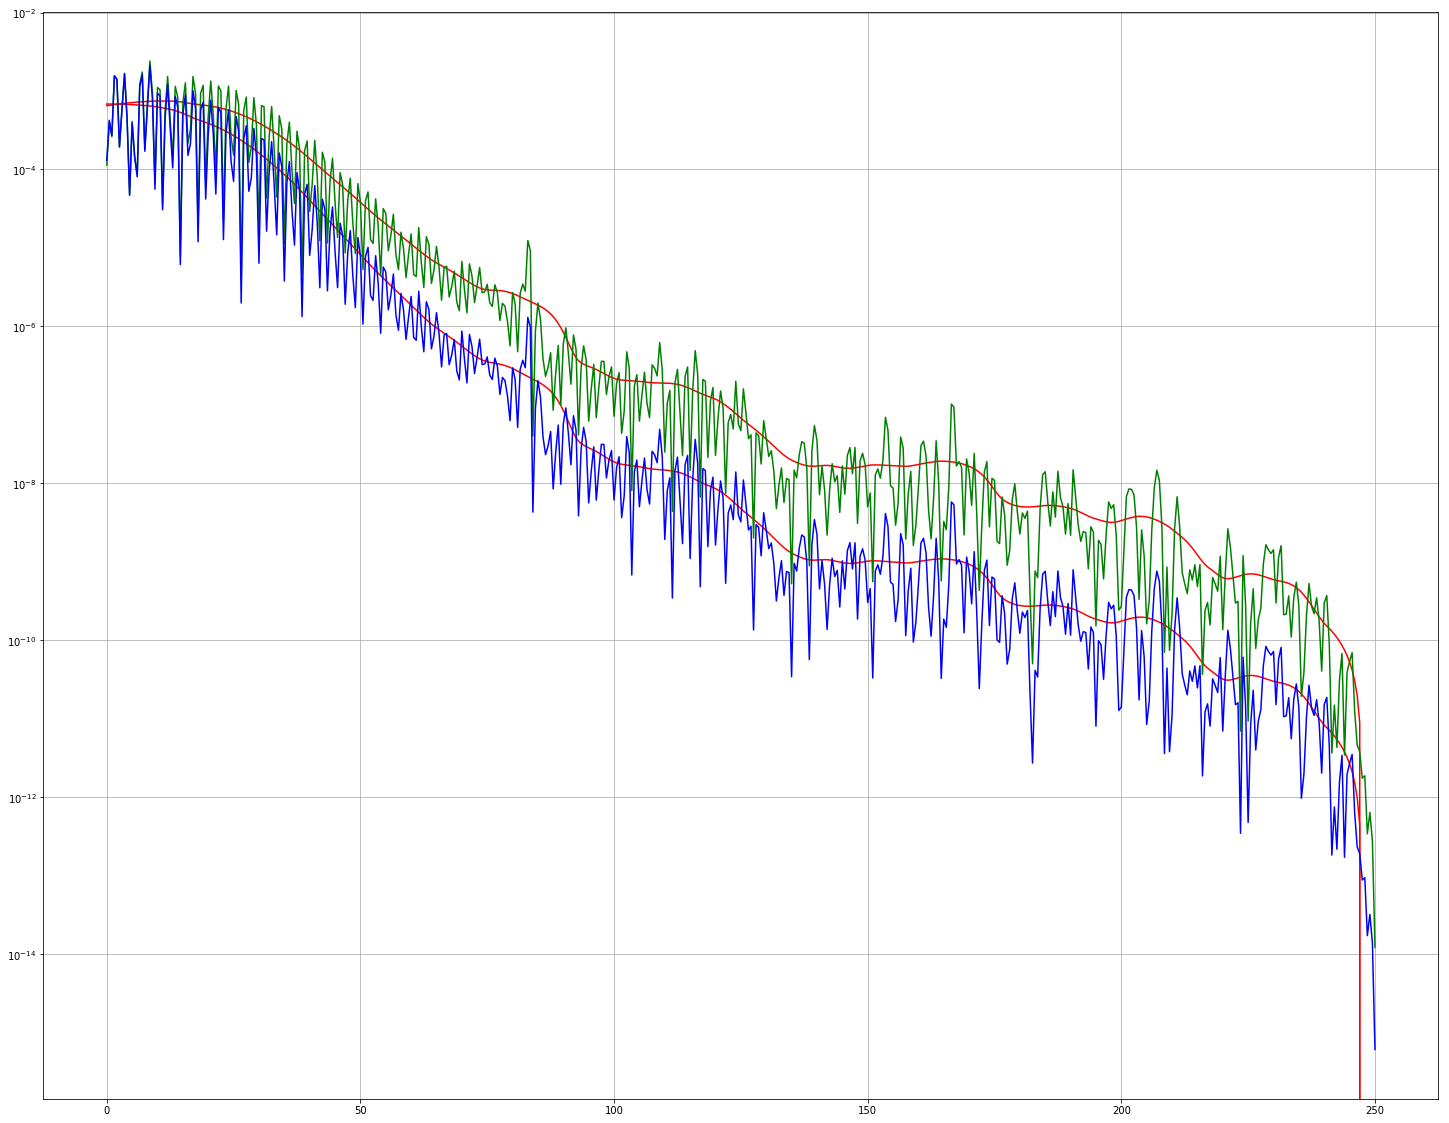

In [80]:
filtered = lowess(Pxx_den, f, is_sorted=True,frac=0.085, it=0 )
plt.figure(figsize=(25,20))
filtered1 = lowess(Pxx_den1, f1, is_sorted=True,frac=0.085, it=0 )
plt.semilogy(filtered[:,0],filtered[:,1],'r')
plt.semilogy(filtered1[:,0],filtered1[:,1],'r')
plt.semilogy(f1, Pxx_den1,'g-')
plt.semilogy(f, Pxx_den,'b-')
plt.grid()